## Youtube Comment Sentiment Analysis



# Steps

+ Scrap Comments from youtube 
    - This can be done multiple ways the method used for this analysis was using a script in google excel sheet which loaded all the comments direction for the script can b found here: https://github.com/MAN1986/LearningOrbis
+  Clean the comments 
+ Text Preprocessing 
+ Keyword / tokenization 
+ Sentiment Analysis
    

# Packages used 
 -  Numpy
 -  Matplot 
 -  Pandas
 -  Wordcloud
 -  Seaborn
 -  neattext

In [ ]:
# th below code is used to download packages in the jupyter notebook
import sys 
!{sys.executable} -m pip install wordcloud

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


Read data from location 

In [2]:
df = pd.read_csv("/Users/eastsaahara/Documents/comm.csv")

In [3]:
#view of first 5 rows of the data
df.head()

,Comment
0,I hope you enjoy the views from the 78th floor...
1,"you&#39;d have to be paying me the $39,500,000..."
2,if all of us in the comments pool our money to...
3,This video are what dreams are for even if one...
4,I think it&#39;s depressing. So Pale


In [4]:
# Convert the data type of the data to a string 
df = df.astype({"Comment": str})

## Text 
- Text Preproccessing 
- Sentiment Analysis 
- Keyword Extraction


In [5]:
df.dtypes

Comment    object
dtype: object

## Text Preprocessing 

In [6]:
import neattext.functions as nfx 

In [7]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [8]:
df['Comment'].iloc[0]

'I hope you enjoy the views from the 78th floor penthouse. Let me know if you could live 78 floors up in the air with these views.'

### remove noise from comments

+ remove special characters
+ hashtags 
+ multiple spaces
+ urls  
+ emojis 
+ special char
+ remove numbers *not sure if this is beneficial* 

In [9]:
df['clean_comment'] = df['Comment'].apply(nfx.remove_special_characters)

In [10]:
df.head()

,Comment,clean_comment
0,I hope you enjoy the views from the 78th floor...,I hope you enjoy the views from the 78th floor...
1,"you&#39;d have to be paying me the $39,500,000...",you39d have to be paying me the 39500000 to ge...
2,if all of us in the comments pool our money to...,if all of us in the comments pool our money to...
3,This video are what dreams are for even if one...,This video are what dreams are for even if one...
4,I think it&#39;s depressing. So Pale,I think it39s depressing So Pale


In [11]:
df['clean_comment'] = df['clean_comment'].apply(nfx.remove_emojis)

In [12]:
df['clean_comment'] = df['clean_comment'].apply(nfx.remove_hashtags)

In [13]:
df['clean_comment'] = df['clean_comment'].apply(nfx.remove_multiple_spaces)

In [14]:
df['clean_comment'] = df['clean_comment'].apply(nfx.remove_punctuations)

In [15]:
df['clean_comment'] = df['clean_comment'].apply(nfx.remove_numbers)

In [16]:
df['clean_comment'] = df['clean_comment'].apply(nfx.remove_html_tags)

In [17]:
df['clean_comment'] = df['clean_comment'].apply(nfx.remove_urls)

In [18]:
df.head()

,Comment,clean_comment
0,I hope you enjoy the views from the 78th floor...,I hope you enjoy the views from the th floor p...
1,"you&#39;d have to be paying me the $39,500,000...",youd have to be paying me the to get me to li...
2,if all of us in the comments pool our money to...,if all of us in the comments pool our money to...
3,This video are what dreams are for even if one...,This video are what dreams are for even if one...
4,I think it&#39;s depressing. So Pale,I think its depressing So Pale


### Sentiment Analysis 

In [19]:
from textblob import TextBlob

In [20]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [21]:
ex1 = df['clean_comment'].iloc[0]
ex1

'I hope you enjoy the views from the th floor penthouse Let me know if you could live  floors up in the air with these views'

In [22]:
get_sentiment(ex1)

{'polarity': 0.2681818181818182, 'subjectivity': 0.5, 'sentiment': 'Positive'}

In [23]:
df['sentiment_results'] = df['clean_comment'].apply(get_sentiment)

In [24]:
df['sentiment_results']

0      {'polarity': 0.2681818181818182, 'subjectivity...
1      {'polarity': 0.06818181818181818, 'subjectivit...
2      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3      {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4      {'polarity': -0.40499999999999997, 'subjectivi...
                             ...                        
994    {'polarity': -0.2, 'subjectivity': 0.1, 'senti...
995    {'polarity': -0.4, 'subjectivity': 0.6, 'senti...
996    {'polarity': 0.2434523809523809, 'subjectivity...
997    {'polarity': -0.6, 'subjectivity': 0.8, 'senti...
998    {'polarity': 0.12916666666666668, 'subjectivit...
Name: sentiment_results, Length: 999, dtype: object

In [25]:
df['sentiment_results'].iloc[0]

{'polarity': 0.2681818181818182, 'subjectivity': 0.5, 'sentiment': 'Positive'}

In [26]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,0.268182,0.5,Positive


In [27]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [28]:
df.head()

,Comment,clean_comment,sentiment_results,polarity,subjectivity,sentiment
0,I hope you enjoy the views from the 78th floor...,I hope you enjoy the views from the th floor p...,"{'polarity': 0.2681818181818182, 'subjectivity...",0.268182,0.50,Positive
1,"you&#39;d have to be paying me the $39,500,000...",youd have to be paying me the to get me to li...,"{'polarity': 0.06818181818181818, 'subjectivit...",0.068182,0.50,Positive
2,if all of us in the comments pool our money to...,if all of us in the comments pool our money to...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.00,Neutral
3,This video are what dreams are for even if one...,This video are what dreams are for even if one...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.00,Neutral
4,I think it&#39;s depressing. So Pale,I think its depressing So Pale,"{'polarity': -0.40499999999999997, 'subjectivi...",-0.405000,0.54,Negative


In [29]:
df['sentiment'].value_counts()

Positive    456
Neutral     327
Negative    216
Name: sentiment, dtype: int64

<AxesSubplot:>

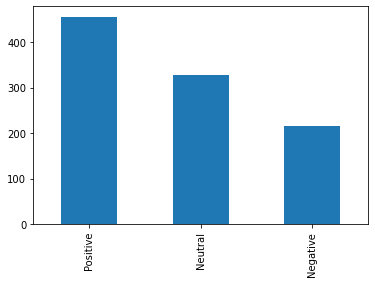

In [30]:
df['sentiment'].value_counts().plot(kind='bar')

### Keyword Extraction
+ For Positive and Negative Sentiment

In [31]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_comment']
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_comment']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_comment']

In [32]:
negative_tweet

4                         I think its depressing So Pale
5                         looks freezing cold and Jewish
13     Impressing flat A little scary because of vert...
14          Its so cold and ugly in my opinion No thanks
24                             It feels so souless empty
                             ...                        
992    Also dont forget to give a  to the bum sitting...
993    I thought I was poor before watching this vide...
994    Id rather buy a house by the beach with a few ...
995    Sell everything and give the money to the poor...
997      That is the ugliest fucking kitchen i have seen
Name: clean_comment, Length: 216, dtype: object

In [33]:
# Remove Stopwords and Convert to Tokens
positive_comment_list = positive_tweet.apply(nfx.remove_stopwords).tolist()
negative_comment_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_comment_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [34]:
# Tokenization
for line in positive_comment_list:
#     print(line)
    for token in line.split():
        print(token)

hope
enjoy
views
th
floor
penthouse
Let
know
live
floors
air
views
youd
paying
live
dump
quotAmazing
Viewsquot
amazing
mean
rundown
skyscrapers
polluted
river
Stunning
NY
need
like
life
guarantee
thisbrYou
deserve
itbrbrThere
thousands
homeless
people
obnoxious
pompous
Rich
materialistic
pieces
garbage
masterpieces
like
Looks
lifeless
hollow
couldnt
pay
live
result
low
interest
rates
government
printing
stealing
trillions
dollars
wallstreet
playing
russian
roulette
savings
Beautiful
views
expensive
like
house
man
style
minimalist
masculine
details
quotHeylets
film
property
foggysnowy
day
highlight
fantastic
viewquotbridiots
great
video
huge
profits
investment
started
trading
Mrs
Kathleen
Jones
trading
strategies
topnotch
Shes
looks
like
house
gta
V
Sure
nice
prefer
studio
apartment
nice
im
looking
spend
mill
place
awful
money
costs
isnt
kind
place
remodel
everythingbri
wouldnt
want
live
money
buy
ive
seen
better
far
Incredible
views
living
wrong
time
stay
high
apartment
breath
pollutio

In [35]:
pos_tokens = [token for line in positive_comment_list  for token in line.split()]
neg_tokens = [token for line in negative_comment_list  for token in line.split()]
neut_tokens = [token for line in neutral_comment_list  for token in line.split()]

In [36]:
pos_tokens

['hope',
 'enjoy',
 'views',
 'th',
 'floor',
 'penthouse',
 'Let',
 'know',
 'live',
 'floors',
 'air',
 'views',
 'youd',
 'paying',
 'live',
 'dump',
 'quotAmazing',
 'Viewsquot',
 'amazing',
 'mean',
 'rundown',
 'skyscrapers',
 'polluted',
 'river',
 'Stunning',
 'NY',
 'need',
 'like',
 'life',
 'guarantee',
 'thisbrYou',
 'deserve',
 'itbrbrThere',
 'thousands',
 'homeless',
 'people',
 'obnoxious',
 'pompous',
 'Rich',
 'materialistic',
 'pieces',
 'garbage',
 'masterpieces',
 'like',
 'Looks',
 'lifeless',
 'hollow',
 'couldnt',
 'pay',
 'live',
 'result',
 'low',
 'interest',
 'rates',
 'government',
 'printing',
 'stealing',
 'trillions',
 'dollars',
 'wallstreet',
 'playing',
 'russian',
 'roulette',
 'savings',
 'Beautiful',
 'views',
 'expensive',
 'like',
 'house',
 'man',
 'style',
 'minimalist',
 'masculine',
 'details',
 'quotHeylets',
 'film',
 'property',
 'foggysnowy',
 'day',
 'highlight',
 'fantastic',
 'viewquotbridiots',
 'great',
 'video',
 'huge',
 'profits',

In [37]:
# Get Most Commonest Keywords
from collections import Counter

In [38]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [39]:
get_tokens(pos_tokens)

{'like': 79,
 'live': 65,
 'million': 53,
 'money': 49,
 'place': 47,
 'buy': 42,
 'views': 38,
 'view': 36,
 'people': 34,
 'house': 34,
 'lol': 32,
 'home': 30,
 'amazing': 29,
 'nice': 29,
 'pay': 27,
 'dont': 26,
 'want': 25,
 'apartment': 24,
 'better': 24,
 'York': 24,
 'penthouse': 23,
 'New': 23,
 'worth': 23,
 'price': 23,
 'city': 22,
 'look': 22,
 'good': 21,
 'Im': 19,
 'world': 17,
 'wouldnt': 16}

In [40]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [41]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [42]:
neg_df

,words,scores
0,million,24
1,money,23
2,live,21
3,like,20
4,worth,18
5,city,18
6,dont,18
7,people,17
8,place,14
9,poor,13


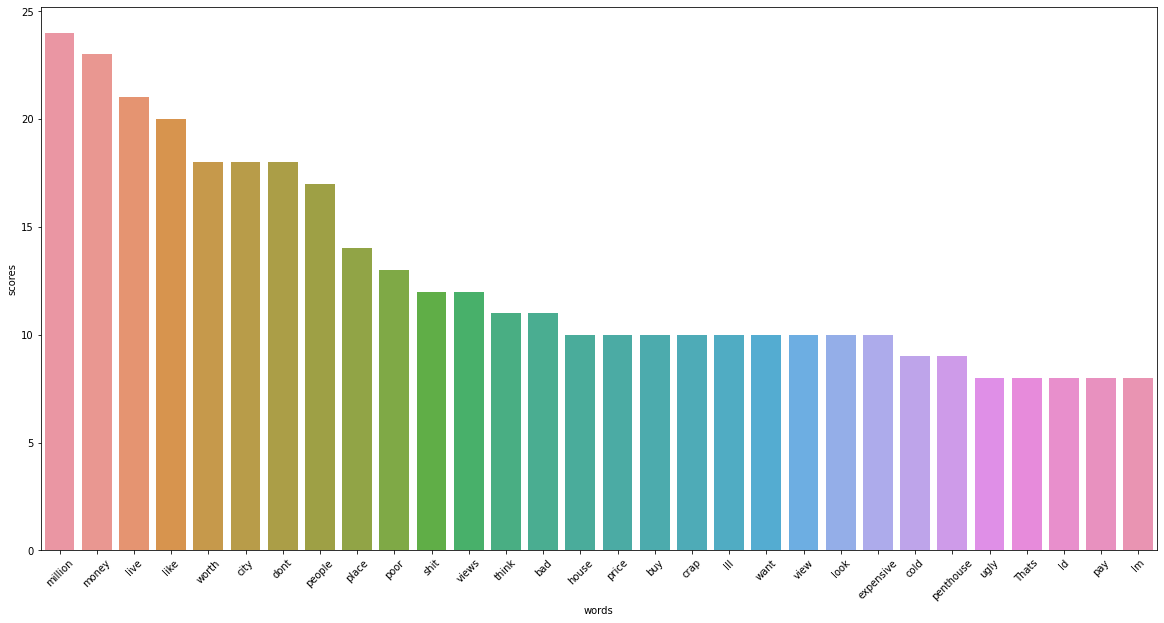

In [43]:
#plot of most common negative words 
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

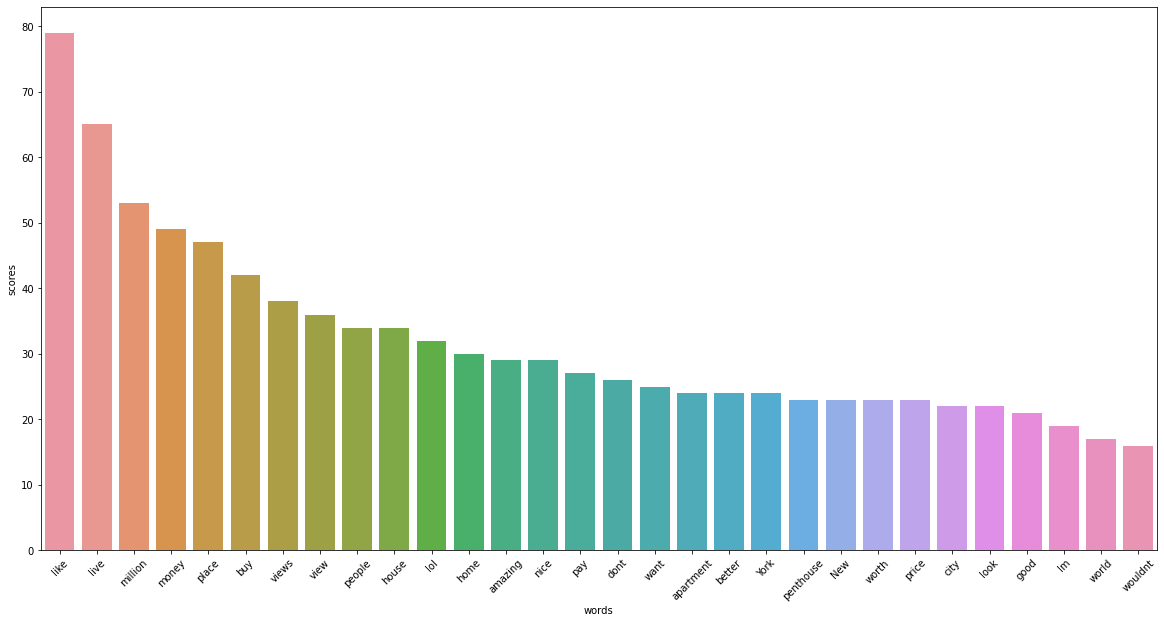

In [44]:
#plot of most common postive words 
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

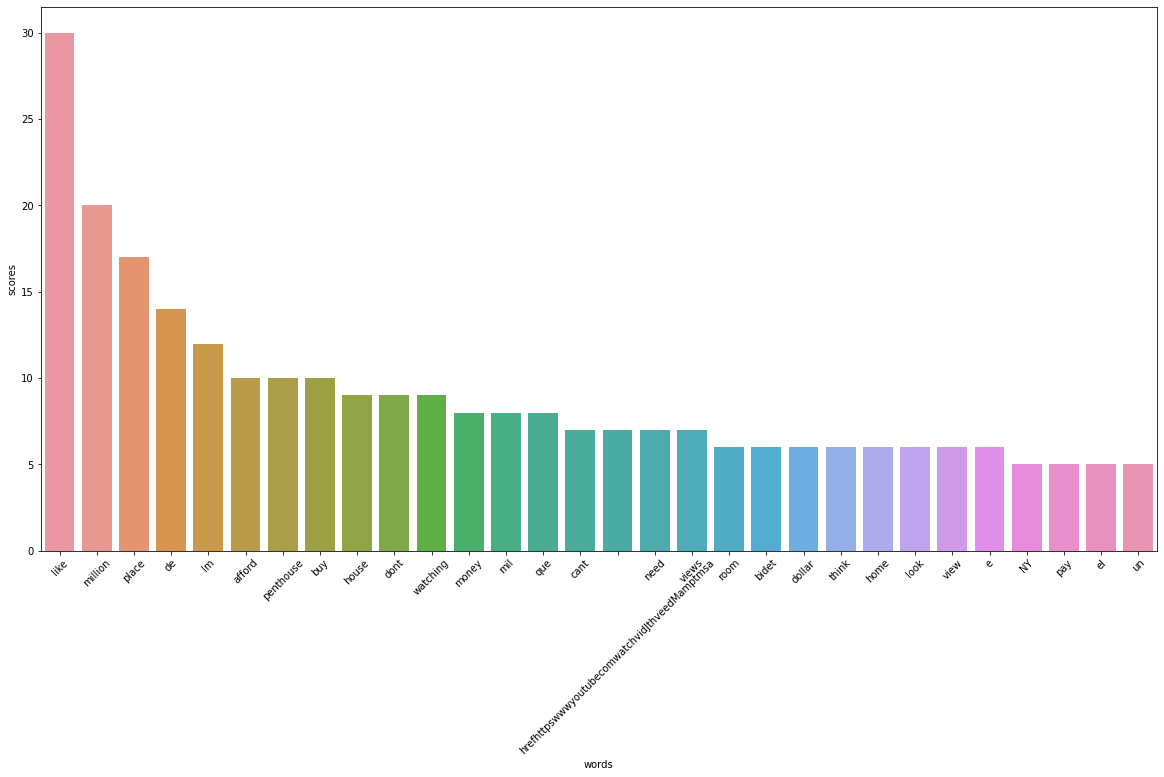

In [45]:
#plot of most common neutral words 
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

In [46]:
### Word Cloud
from wordcloud import WordCloud

In [47]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [48]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

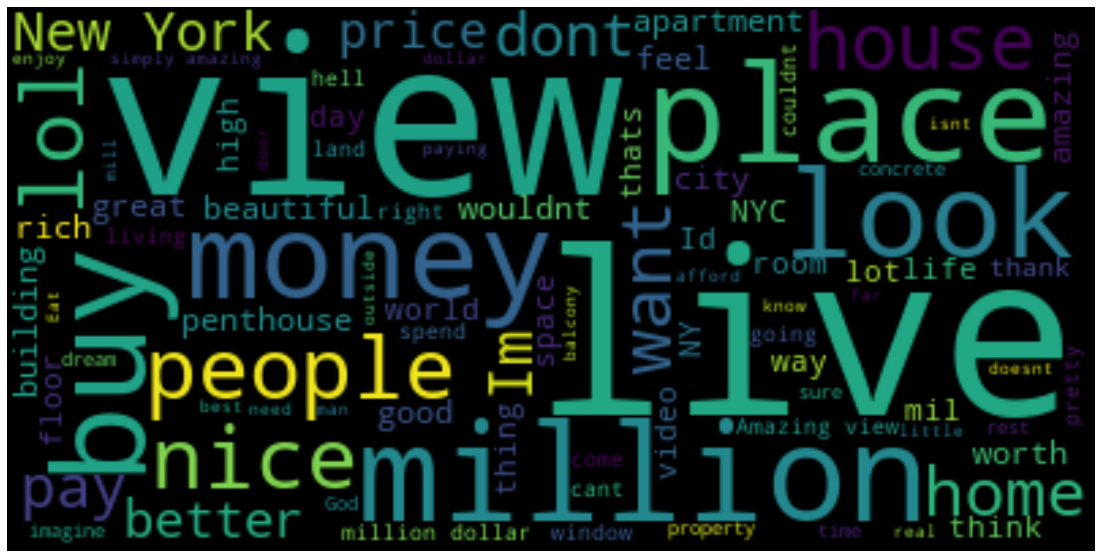

In [49]:
plot_wordcloud(pos_docx)

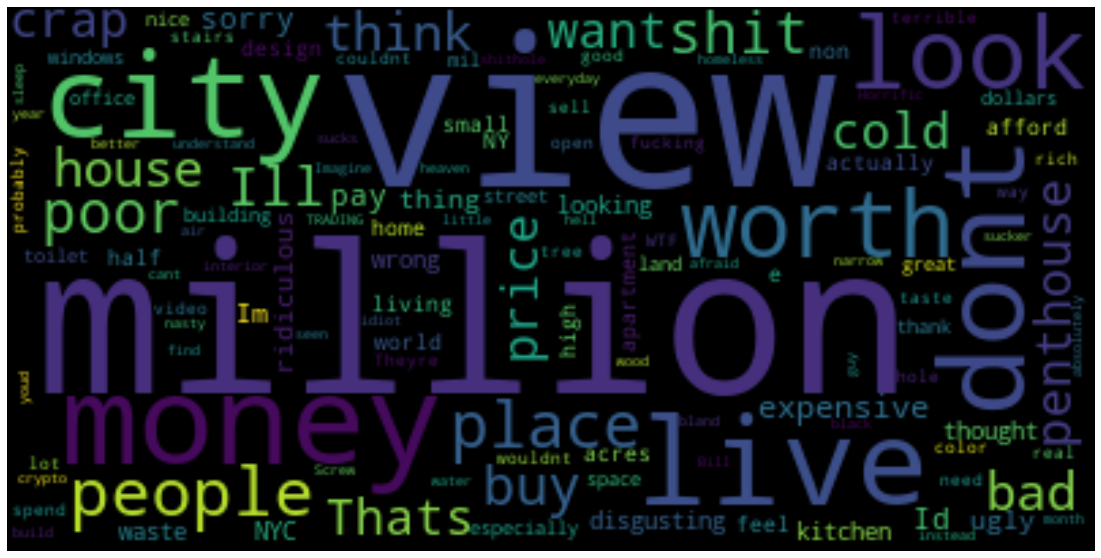

In [50]:
plot_wordcloud(neg_docx)

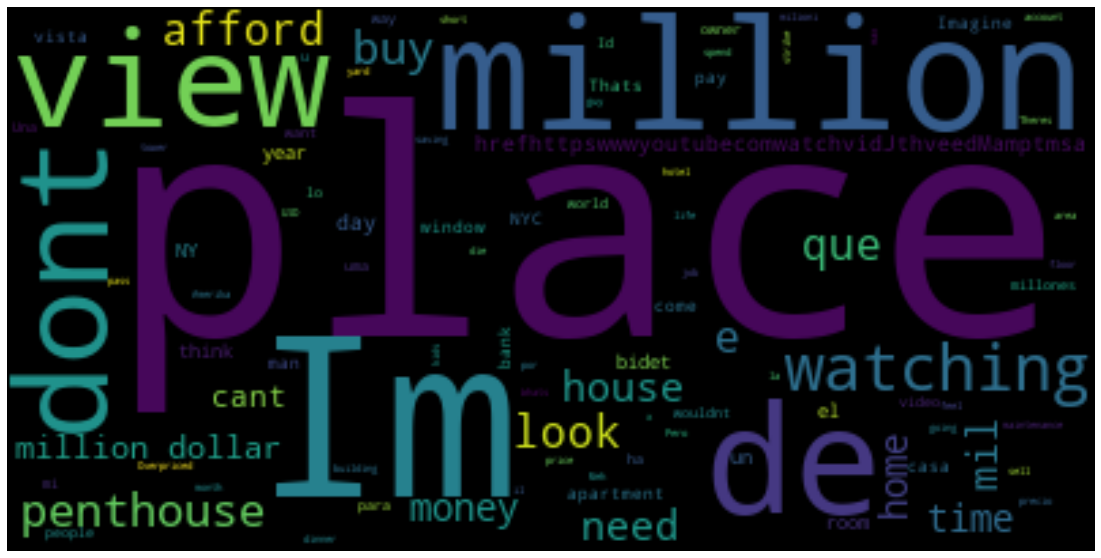

In [51]:
plot_wordcloud(neu_docx)